In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
a = np.random.normal(size=(50,100))
b = np.random.normal(size=(50,20))
ind = np.random.choice(["a","b"], size=(50,))
out = train_test_split(a,b,ind, test_size=0.8)
for i in out:
    print(i.shape)

(10, 100)
(40, 100)
(10, 20)
(40, 20)
(10,)
(40,)


In [2]:
import scanpy as sc
import squidpy as sq
from pathlib import Path
path_data = Path("/lustre/groups/ml01/workspace/moscot_paper/mapping")
adata_spatial = sc.read(path_data / "vizgen_liver/adata_result.h5ad")

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


['default', 'despine']


/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


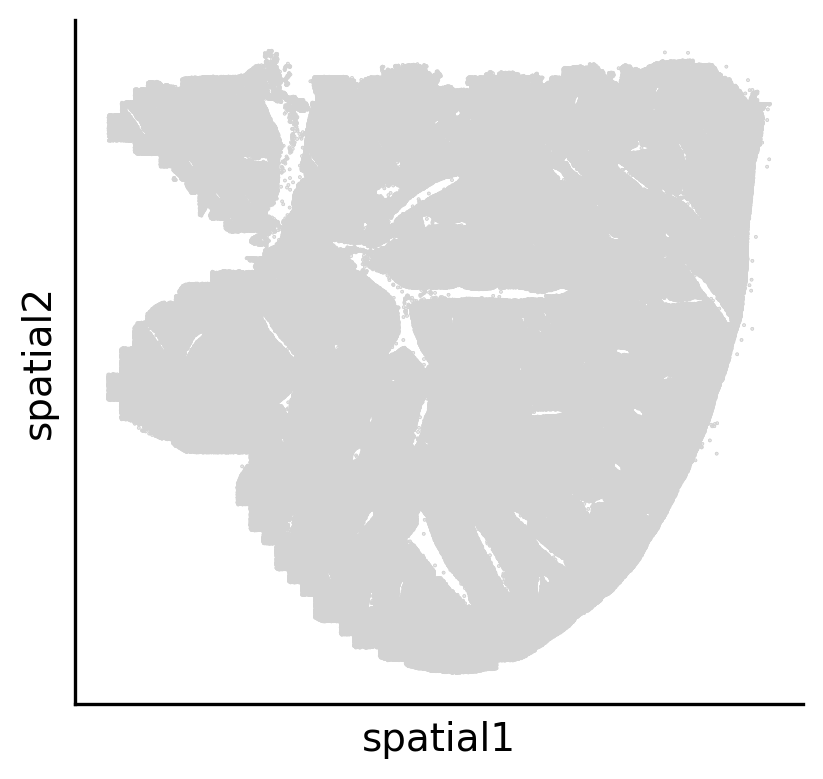

In [4]:
import mplscience
import matplotlib.pyplot as plt

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams["legend.scatterpoints"] = 1

sq.pl.spatial_scatter(adata_spatial, na_color="lightgrey", dpi=200,shape=None)